In [4]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


In [5]:
data = pd.read_csv('german_credit_data.csv',sep = ',')

In [6]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [7]:
type(data['Saving accounts'][0])

float

In [8]:
#data.loc[data['Saving accounts']  , 'Saving accounts'] = 'No'

#data.loc[np.isnan(data['Checking account'])  is true, 'Checking account'] = 'No'

data[['Saving accounts', 'Checking account']] = data[['Saving accounts', 'Checking account']].fillna('No')
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,No,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,No,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,No,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,No,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [10]:
data['Saving accounts'].value_counts() ## Сберегательный счёт

little        603
No            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [11]:
data['Checking account'].value_counts() ## Проверка аккунта? 

No          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [12]:
data['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [13]:
data['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [14]:
numerical_features = ['Age','Job','Credit amount', 'Duration']

categorial_features = ['Housing','Saving accounts','Checking account','Purpose']

binary_features = ['Sex']

In [15]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data[numerical_features])
data_scaled[:10]

array([[ 2.76645648,  0.14694918, -0.74513141, -1.23647786],
       [-1.19140394,  0.14694918,  0.94981679,  2.24819436],
       [ 1.18331231, -1.38377145, -0.41656241, -0.73866754],
       [ 0.8315025 ,  0.14694918,  1.63424694,  1.75038404],
       [ 1.53512213,  0.14694918,  0.5666635 ,  0.25695309],
       [-0.04802204, -1.38377145,  2.05000901,  1.25257373],
       [ 1.53512213,  0.14694918, -0.15462876,  0.25695309],
       [-0.04802204,  1.67766981,  1.30319683,  1.25257373],
       [ 2.23874176, -1.38377145, -0.07523344, -0.73866754],
       [-0.66368922,  1.67766981,  0.69568089,  0.75476341]])

In [16]:
le = LabelEncoder()
data_le = le.fit_transform(data[binary_features])
data_le[:10]

C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
data_ohe = ohe.fit_transform(data[categorial_features])
data_ohe[:10]

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.]])

In [18]:
data_tramsformed = pd.concat([pd.DataFrame(data_scaled, columns=numerical_features),
                                    pd.DataFrame(data_ohe, columns=ohe.get_feature_names()),
                                    pd.DataFrame(data_le,columns= binary_features)
                                   ], axis=1)
data_tramsformed.head()

,Age,Job,Credit amount,Duration,x0_free,x0_own,x0_rent,x1_No,x1_little,x1_moderate,...,x2_rich,x3_business,x3_car,x3_domestic appliances,x3_education,x3_furniture/equipment,x3_radio/TV,x3_repairs,x3_vacation/others,Sex
0,2.766456,0.146949,-0.745131,-1.236478,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,-1.191404,0.146949,0.949817,2.248194,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1.183312,-1.383771,-0.416562,-0.738668,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.831502,0.146949,1.634247,1.750384,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,1.535122,0.146949,0.566664,0.256953,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Определение количества кластеров

## 1 - определим ко-во кластеров с помощью KMeans

In [19]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(data_tramsformed)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
    
inertia    

C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[6702.812,
 5490.076909229611,
 4892.84771347301,
 4479.008863742288,
 4264.151296844326,
 4098.271319480509,
 3939.792898037598,
 3836.981633591759,
 3709.592876260111,
 3625.7429272906297]

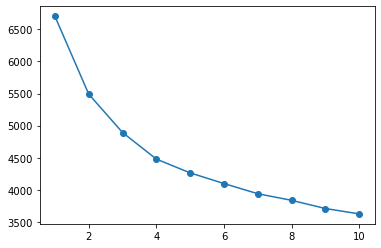

In [20]:
plt.plot(range(1,11), inertia, marker='o');

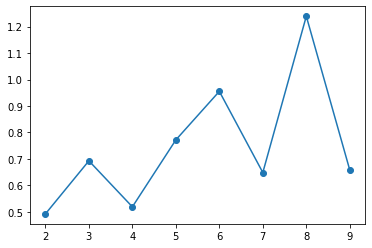

In [21]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
    D.append(Di)
    
plt.plot(range(2,10), D, marker='o');    

## Результат KMeans
По итогу определения кластеров с помощью KMeans - видим, что оптимальным кол-вом является 3

## Построение дендограммы

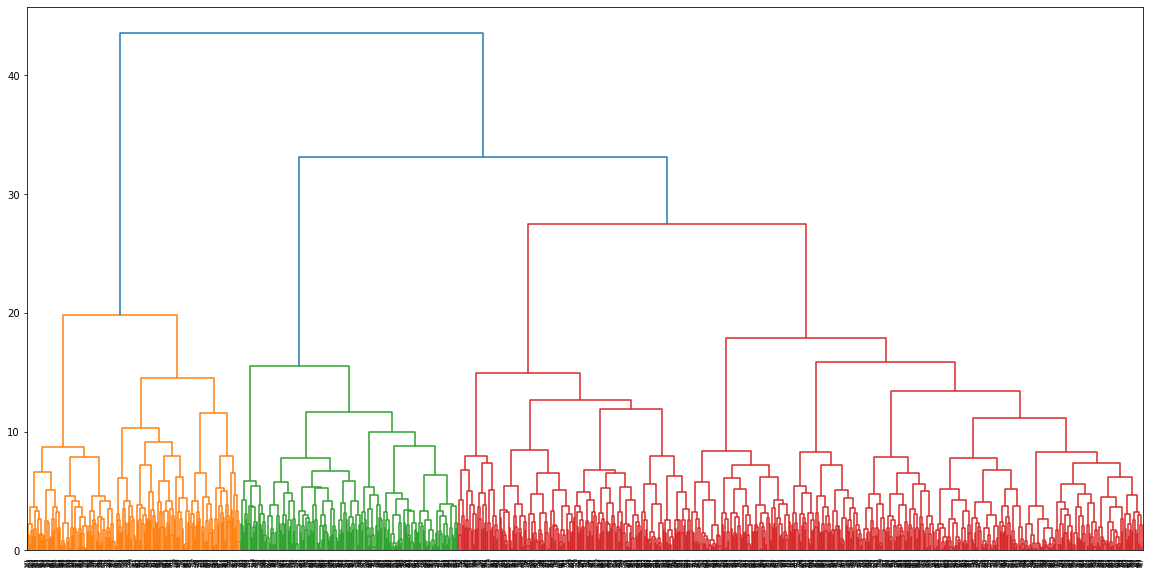

In [22]:
plt.figure(figsize=(20,10))
linkage_ = linkage(data_tramsformed, method='ward')
dendrogram_ = dendrogram(linkage_)

## Результат построения дендограммы
При построении дендограммы видно, что оптимальное кол-во кластеров = 3 или 4

In [23]:
dbscan = DBSCAN().fit(data_tramsformed)
labels = dbscan.labels_

In [24]:
silhouette = []
clusters = []
eps_range = np.arange(0.1,2,0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(data_tramsformed)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(data_tramsformed, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|██████████| 19/19 [00:00<00:00, 41.50it/s]


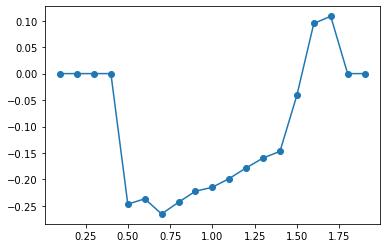

In [25]:
plt.plot(eps_range, silhouette, marker='o');

## Результат поиска количества кластеров при помощи DBSCAN

При построении силуэтного коэффициента, определено кол-во кластеров = 4

## Уменьшение размерности

## 1: TSNE

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components=2, random_state=10)

In [28]:
X_tsne = tsne.fit_transform(data_tramsformed)

C:\Users\spostroumov\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


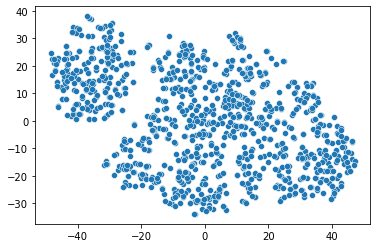

In [29]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1]);

## 2: PCA

In [30]:
from sklearn.decomposition import PCA


In [31]:
pca = PCA(n_components=2, random_state=10)

In [32]:
X_pca = pca.fit_transform(data_tramsformed)

C:\Users\spostroumov\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


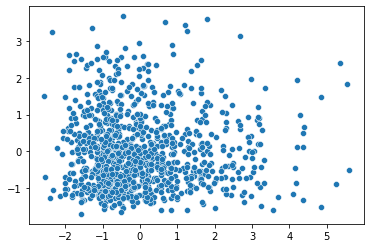

In [33]:
sns.scatterplot(X_pca[:,0], X_pca[:,1]);

## 3: UMAP

In [52]:
pip install umap-learn



  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82820 sha256=ea5f014017692296279e79bf4e60633b561c41d4547980ccbea180f838ebe373
  Stored in directory: c:\users\spostroumov\appdata\local\pip\cache\wheels\a9\3a\67\06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55623 sha256=5ccf2e81dfc6d7178eac538b4e5af782982fa4234e97f90e0e9f0248bfb9d7d1
  Stored in directory: c:\users\spostroumov\appdata\local\pip\cache\wheels\f8\32\54\fa1fd0454e0441eaa32550ea2a86da3f64eb7c8e5a82436770
Successfully built umap-learn pynndescent


In [34]:
from umap import UMAP


In [35]:
umap = UMAP(n_components=2, random_state=10)

In [36]:
X_umap = umap.fit_transform(data_tramsformed)

C:\Users\spostroumov\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


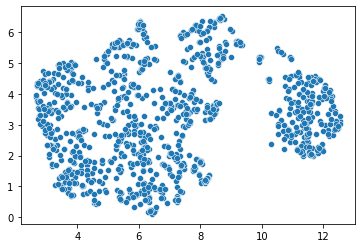

In [37]:
sns.scatterplot(X_umap[:,0], X_umap[:,1]);

## Методы TSNE и UMAP разбивают данные на 2 кластера. Метод PCA не выделяет явные кластеры

## Используем KMeans на данных со сжатыми размерностями

In [38]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(X_umap)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

C:\Users\spostroumov\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


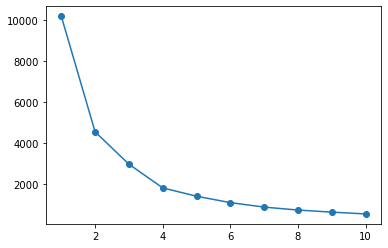

In [39]:
plt.plot(range(1,11), inertia, marker='o');

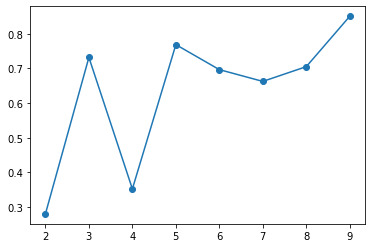

In [40]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)
    
plt.plot(range(2,10), D, marker='o');    

## 2 кластера

In [41]:
kmeans = KMeans(n_clusters=2, random_state=10).fit(X_umap)
labels = kmeans.labels_

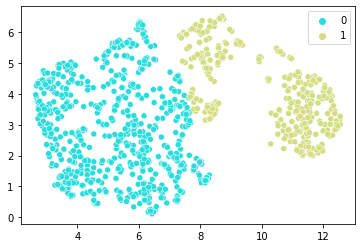

In [42]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels, palette='rainbow');

## 3 кластера

In [43]:
kmeans = KMeans(n_clusters=3, random_state=10).fit(X_umap)
labels = kmeans.labels_

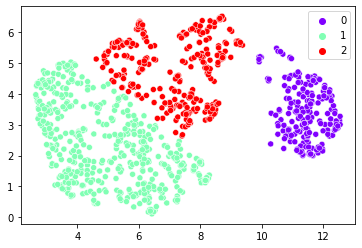

In [44]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels, palette='rainbow');

## 4 кластера

In [45]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(X_umap)
labels = kmeans.labels_

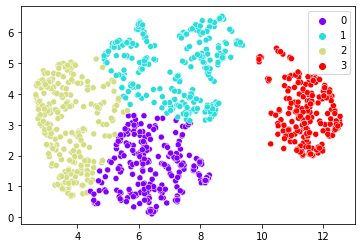

In [46]:
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels, palette='rainbow');

## DBSCAN при сжатых размерностях

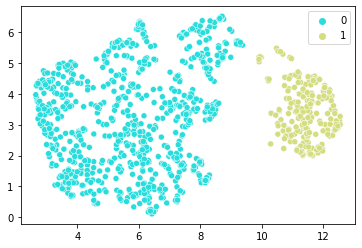

In [47]:
dbscan = DBSCAN(eps=0.6, min_samples=5).fit(X_umap)
labels = dbscan.labels_
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels, palette='rainbow');

## Построим BoxPlots

In [48]:
data['labels'] = labels

In [49]:
data['labels'].value_counts(normalize=True).sort_index()

0    0.791
1    0.209
Name: labels, dtype: float64

In [50]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels
0,0,67,male,2,own,No,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,49,male,1,own,little,No,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,0


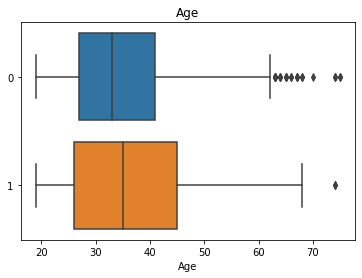

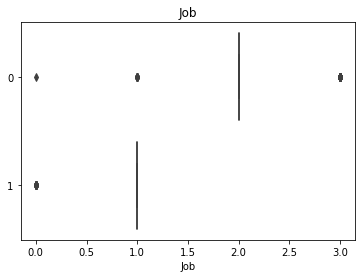

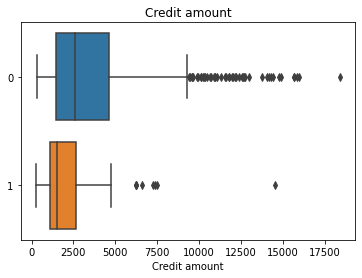

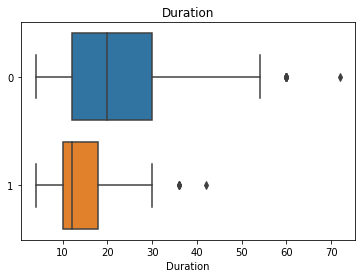

In [51]:
for col in numerical_features:
    
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [52]:
data_tramsformed['labels'] = labels

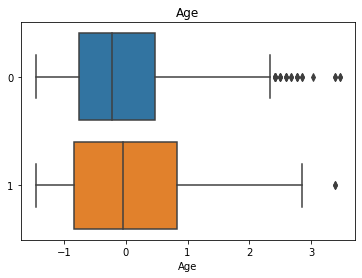

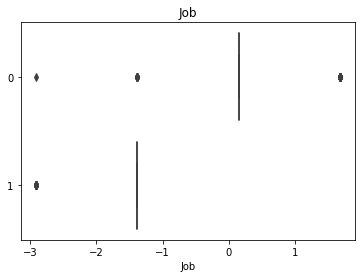

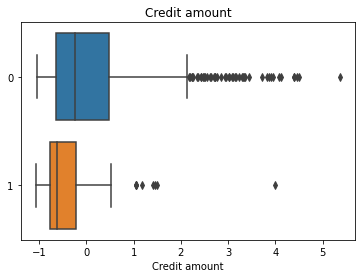

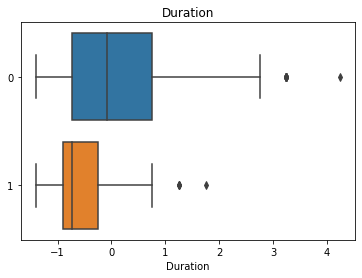

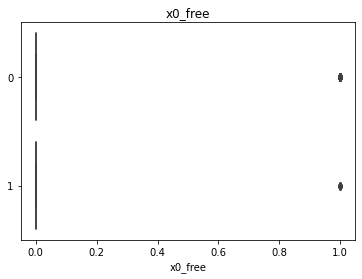

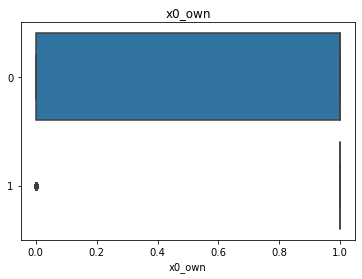

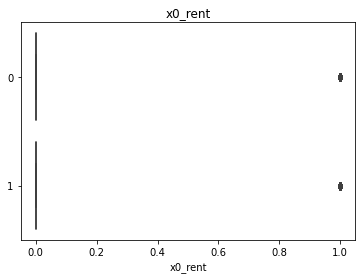

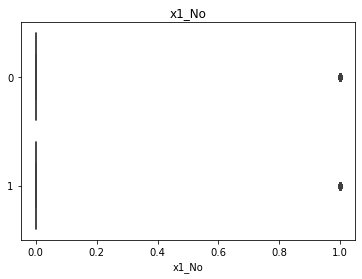

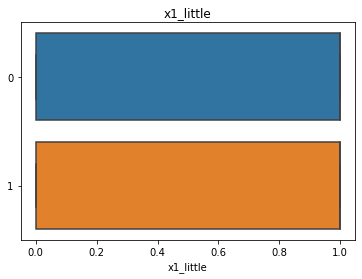

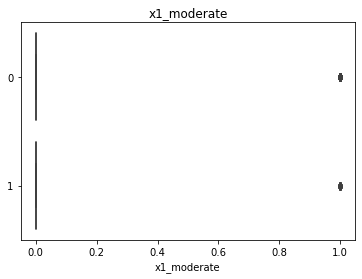

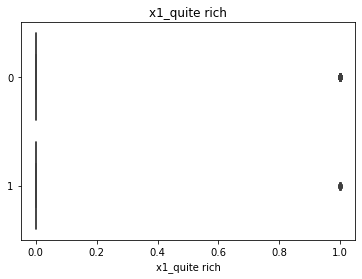

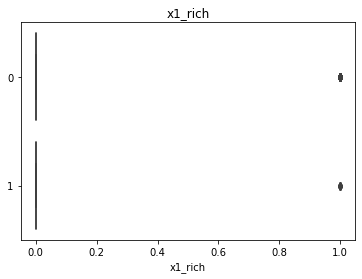

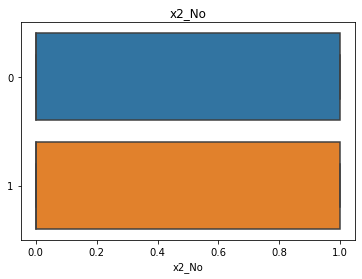

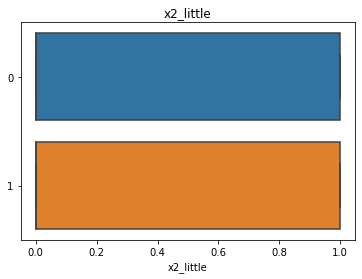

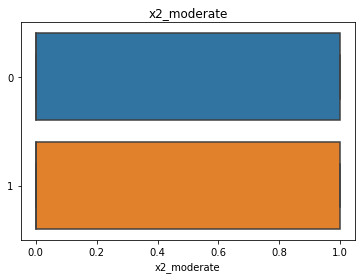

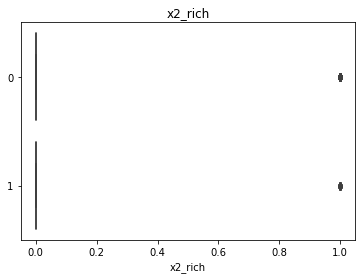

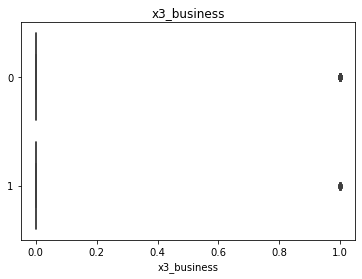

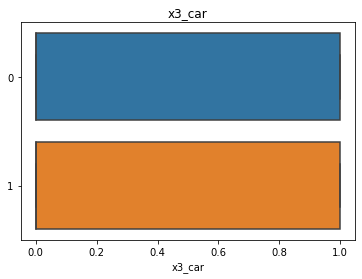

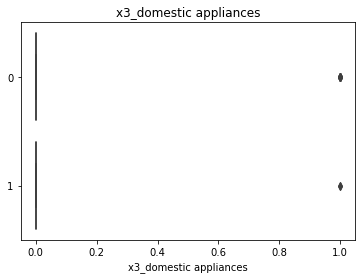

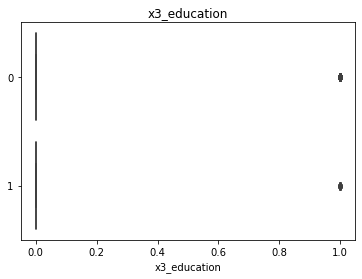

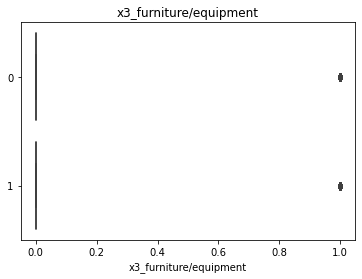

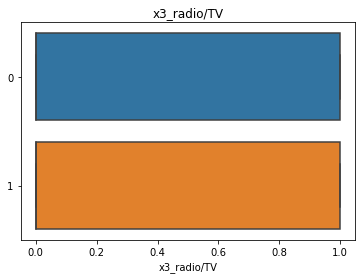

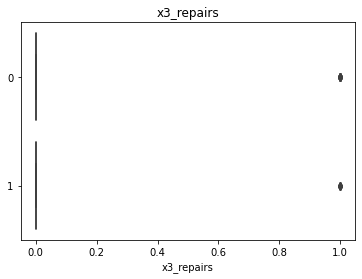

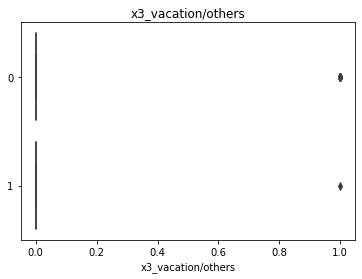

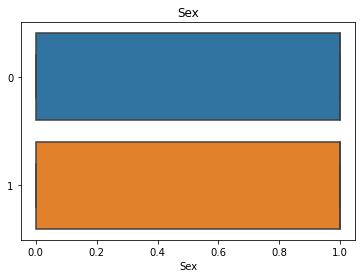

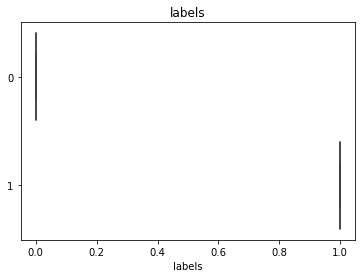

In [53]:
for col in data_tramsformed.columns:
    sns.boxplot(data=data_tramsformed, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();